<H1>HS608 Final Project - Data Exploration</H1><br>
<b>Author: Jessica Stothers</b><br>
<b>Date: 12/13/19</b>

<b>Data Set:</b> NB: variable age_level has been added to original dataset<br>
Abstract: From National Institute of Diabetes and Digestive and Kidney Diseases; Includes cost data
(donated by Peter Turney)<br><br>
<b>Attribute Information:</b>
 - preg: Number of times pregnant<br>
 - plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
 - pres: Diastolic blood pressure (mm Hg)<br>
 - skin: Triceps skin fold thickness (mm)<br>
 - insu: 2-Hour serum insulin (mu U/ml)<br>
 - mass: Body mass index (weight in kg/(height in m)^2)<br>
 - pedi: Diabetes pedigree function<br>
 - age: Age (years)<br>
 - class: Diabetes class variable (0 or 1)<br>
 - age_level: Age level (years)

<H2>Import Libraries and Load Data</H2>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the diabetes data set from the csv file linked from the Canvas assignment.

df = pd.read_csv('diabetes_explore2.csv')

<H2>Exploratory Analysis of Data</H2>

<b>Aggregate Statistics</b>

In [3]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level
0,6,148,72,35,0,33.6,0.627,50,1,50s
1,1,85,66,29,0,26.6,0.351,31,0,30s
2,8,183,64,0,0,23.3,0.672,32,1,30s
3,1,89,66,23,94,28.1,0.167,21,0,20s
4,0,137,40,35,168,43.1,2.288,33,1,30s


In [4]:
df.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         768 non-null int64
pres         768 non-null int64
skin         768 non-null int64
insu         768 non-null int64
mass         768 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


<b>Preprocess Data</b><br>
Replace impossible 0 values with NaN

In [6]:
df2 = df.copy(deep=True)

df2['plas'].replace(0, np.nan, inplace=True) 
df2['pres'].replace(0, np.nan, inplace=True)
df2['skin'].replace(0, np.nan, inplace=True)
df2['insu'].replace(0, np.nan, inplace=True)
df2['mass'].replace(0, np.nan, inplace=True)

df2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null int64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null int64
class        768 non-null int64
age_level    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [8]:
# see the levels in age_level
df2.age_level.unique()

array(['50s', '30s', '20s', '40s', '60+'], dtype=object)

Change age_level to ordinal integers for machine learning.

In [9]:
# alternative is to one-hot encode, but since age_level is ordinal, chose to encode ordinally
df2['age_level'].replace('20s', 0, inplace=True) 
df2['age_level'].replace('30s', 1, inplace=True)
df2['age_level'].replace('40s', 2, inplace=True)
df2['age_level'].replace('50s', 3, inplace=True)
df2['age_level'].replace('60+', 4, inplace=True)

df2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958,0.911458
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951,1.155441
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000,2.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,4.000000


Change preg, age, class and age_level to floats so all variables are same data type for machine learning.

In [10]:
df2 = df2.astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
preg         768 non-null float64
plas         763 non-null float64
pres         733 non-null float64
skin         541 non-null float64
insu         394 non-null float64
mass         757 non-null float64
pedi         768 non-null float64
age          768 non-null float64
class        768 non-null float64
age_level    768 non-null float64
dtypes: float64(10)
memory usage: 60.1 KB


<b>Groupby Diabetes Class</b>

In [11]:
diab_class = df2.groupby(['class'])
diab_class.describe()

age                                                     age_level  \
       count       mean        std   min   25%   50%   75%   max     count   
class                                                                        
0.0    500.0  31.190000  11.667655  21.0  23.0  27.0  37.0  81.0     500.0   
1.0    268.0  37.067164  10.968254  21.0  28.0  36.0  44.0  70.0     268.0   

                 ...   pres          skin                                   \
           mean  ...    75%    max  count       mean        std  min   25%   
class            ...                                                         
0.0    0.712000  ...   78.0  122.0  361.0  27.235457  10.026491  7.0  19.0   
1.0    1.283582  ...   84.0  114.0  180.0  33.000000  10.327595  7.0  27.0   

                         
        50%   75%   max  
class                    
0.0    27.0  33.0  60.0  
1.0    32.0  39.0  99.0  

[2 rows x 72 columns]

<H2>Correlation</H2>

In [31]:
# correlation matrix
df2.corr()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age_level
preg,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898,0.524903
plas,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650,0.258513
pres,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589,0.310686
skin,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491,0.141390
insu,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454,0.224240
mass,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680,0.011346
pedi,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844,0.029788
age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356,0.971425
class,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000,0.235942
age_level,0.524903,0.258513,0.310686,0.141390,0.224240,0.011346,0.029788,0.971425,0.235942,1.000000


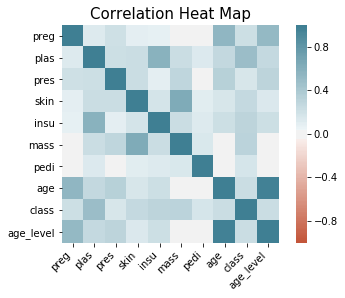

In [38]:
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Correlation Heat Map', fontsize=15)
plt.show()

From this correlation matrix we see high correlation (>0.7) between age and age_level (0.97), as they are based on the same measurements. We also see medium correlation (>0.5) between age and preg (0.54), age_level and preg (0.52), plas and insu (0.58) and skin and mass (0.65). These correlations are expected, as older women have had more time in which to become pregant so are morel likely to have had a larger number of pregnancies than younger women. Insulin helps to regulate blood glucose levels, so it is also unsurprising that plas and insu are related. Skin and mass's correlation level can be explained by both of these variables being indirect measures of body fat.<br><br>The variable most highly correlated with diabetes in this dataset is plas (0.49), followed by insu (0.30) and mass (0.31).

<H2>Null Values</H2>

In [12]:
# Percent of null values in each variable
(df2.isnull().sum() / 768 * 100).round(2) # sum of nulls, divided by number of rows, x 100, rounded

preg          0.00
plas          0.65
pres          4.56
skin         29.56
insu         48.70
mass          1.43
pedi          0.00
age           0.00
class         0.00
age_level     0.00
dtype: float64

Almost half of the values in insu are null (49%), while about one third of skin values are null (30%). This should be taken into account when performing analyses on this datset.

<H2>Variable Distributions</H2>

In [13]:
%matplotlib inline

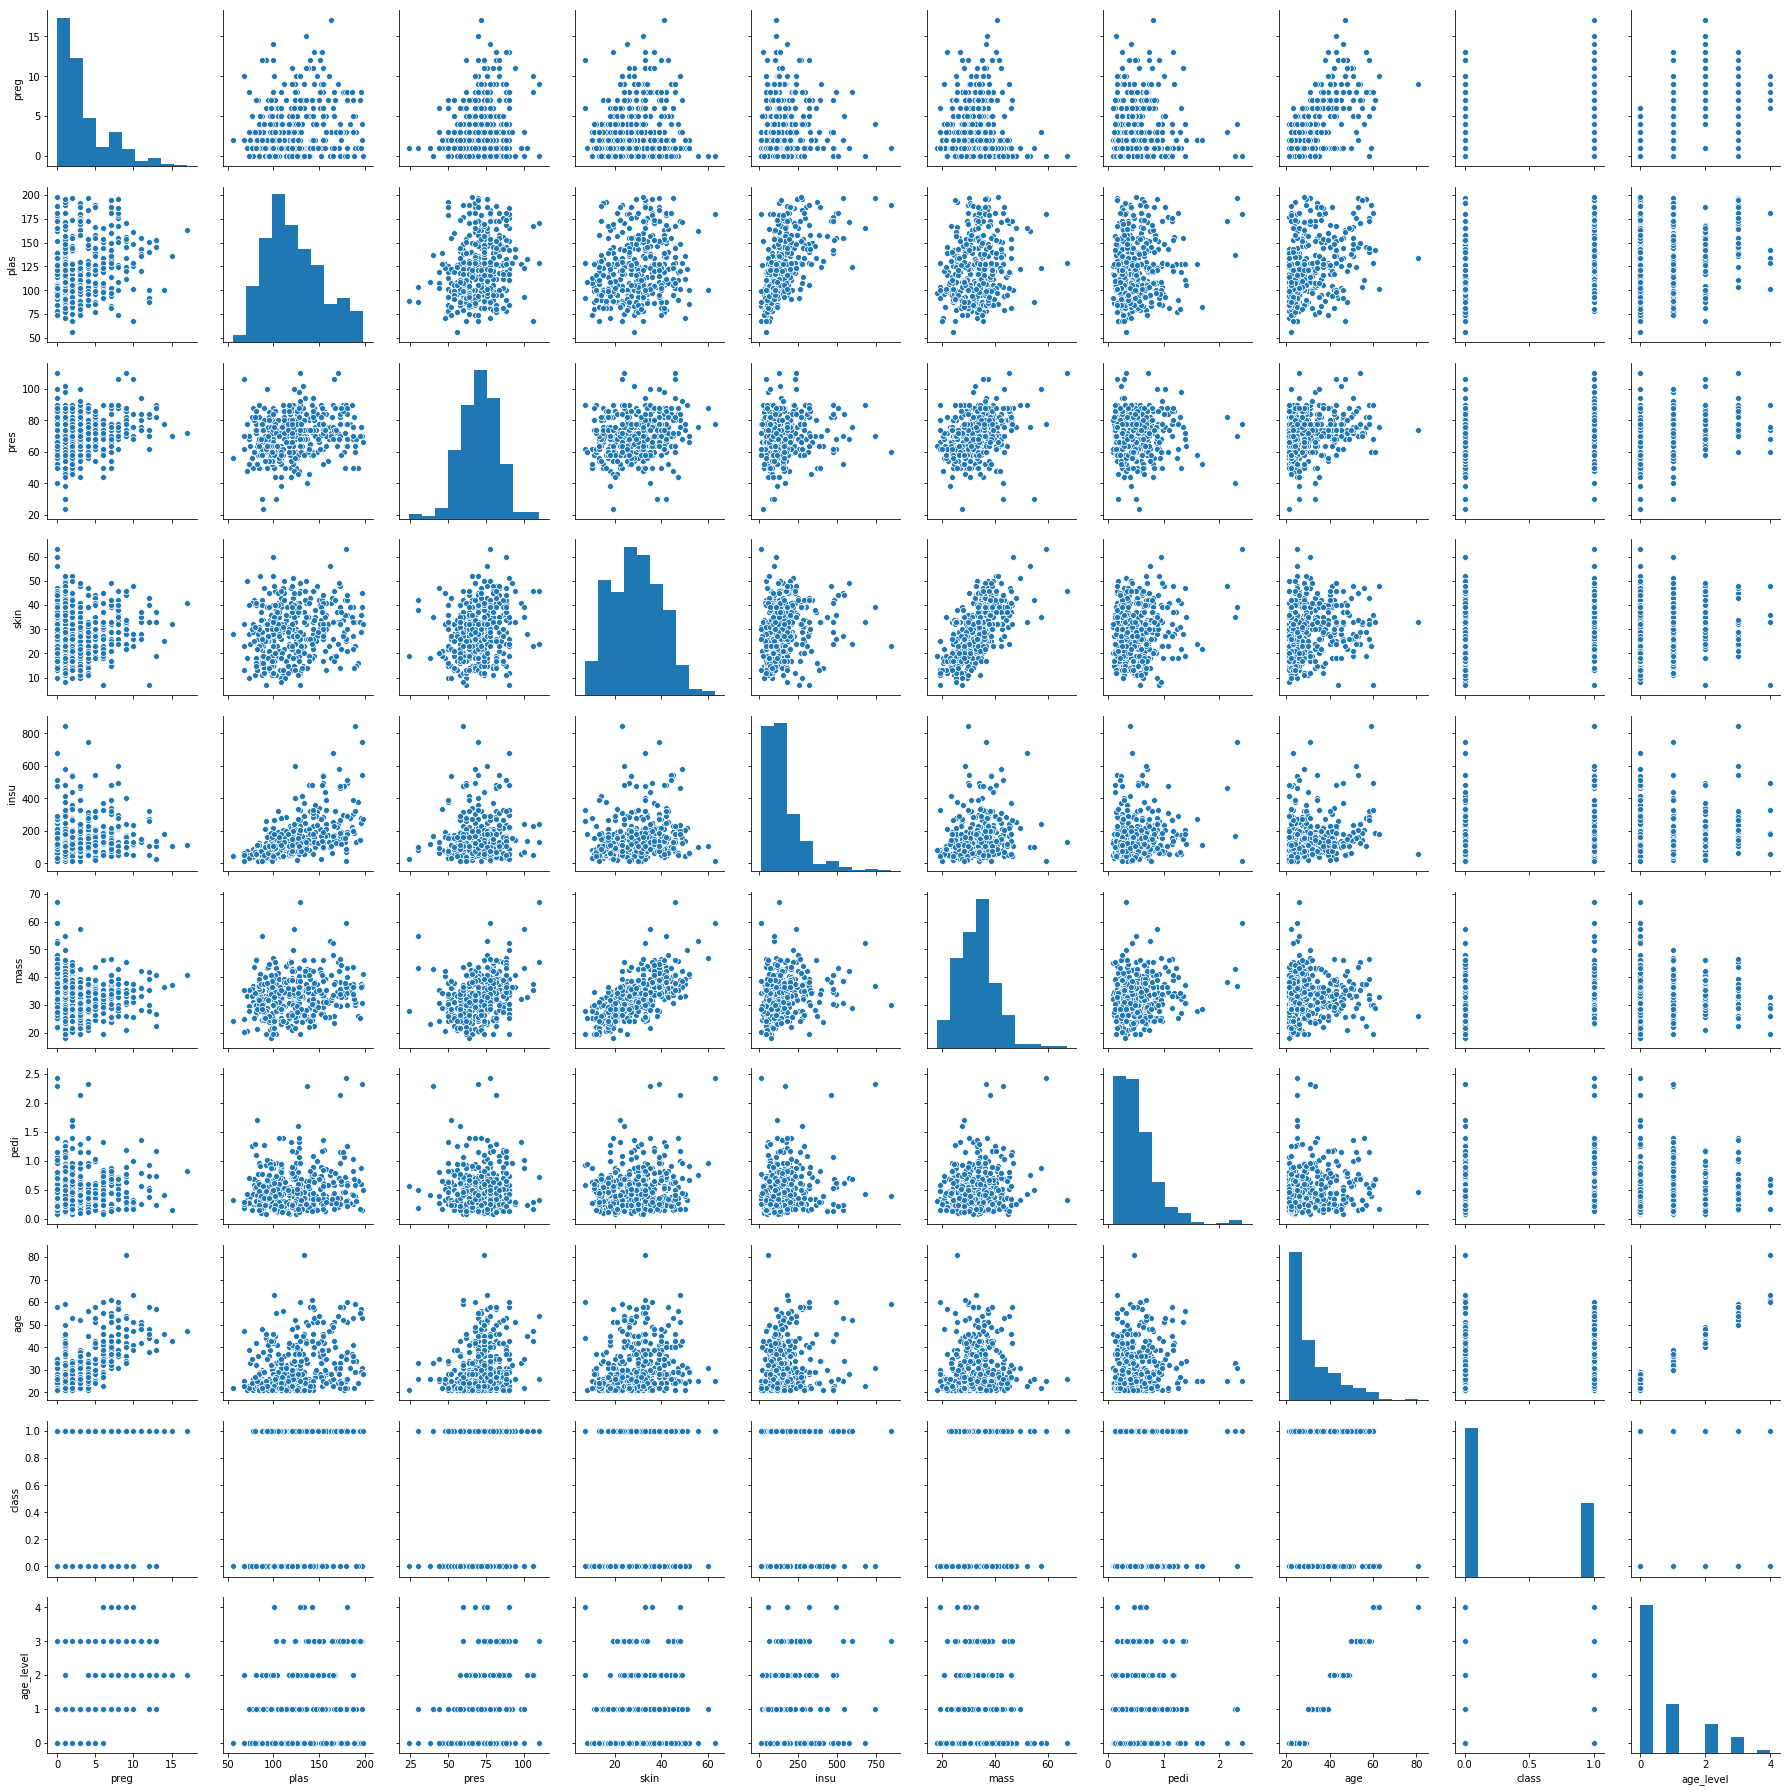

In [14]:
plot_df = df2.dropna()
sns.pairplot(plot_df)

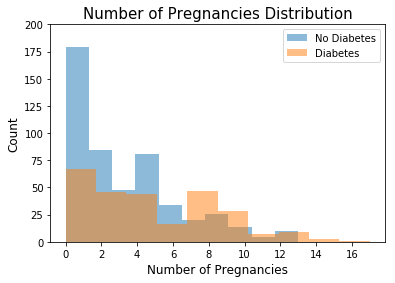

In [15]:
df2.groupby('class')['preg'].plot.hist(alpha=0.5)
plt.title('Number of Pregnancies Distribution', fontsize=15)
plt.xlabel('Number of Pregnancies', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(range(0, 18, 2))
plt.yticks(range(0, 201, 25))
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

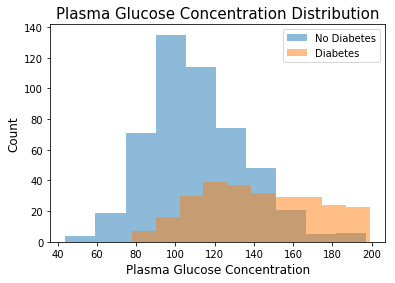

In [16]:
df2.groupby('class')['plas'].plot.hist(alpha=0.5)
plt.title('Plasma Glucose Concentration Distribution', fontsize=15)
plt.xlabel('Plasma Glucose Concentration', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

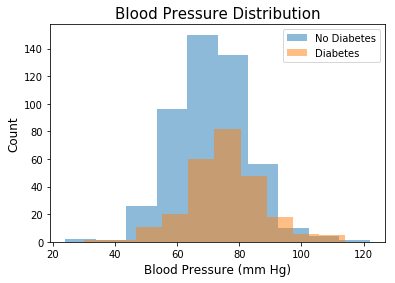

In [17]:
df2.groupby('class')['pres'].plot.hist(alpha=0.5)
plt.title('Blood Pressure Distribution', fontsize=15)
plt.xlabel('Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

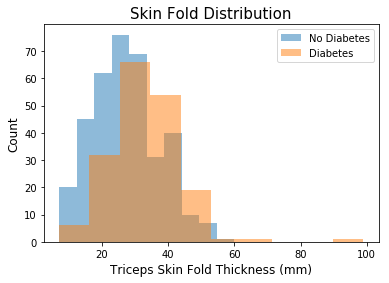

In [18]:
df2.groupby('class')['skin'].plot.hist(alpha=0.5)
plt.title('Skin Fold Distribution', fontsize=15)
plt.xlabel('Triceps Skin Fold Thickness (mm)', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

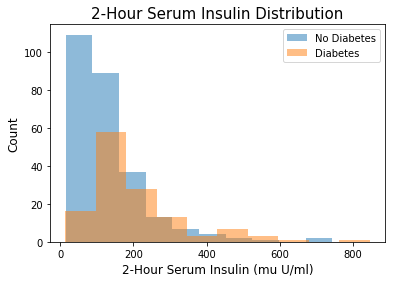

In [19]:
df2.groupby('class')['insu'].plot.hist(alpha=0.5)
plt.title('2-Hour Serum Insulin Distribution', fontsize=15)
plt.xlabel('2-Hour Serum Insulin (mu U/ml)', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

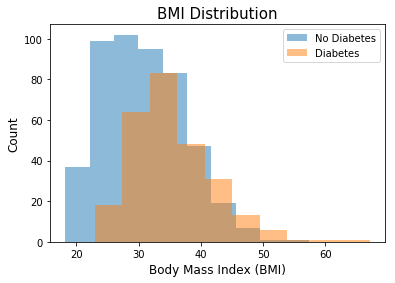

In [20]:
df2.groupby('class')['mass'].plot.hist(alpha=0.5)
plt.title('BMI Distribution', fontsize=15)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

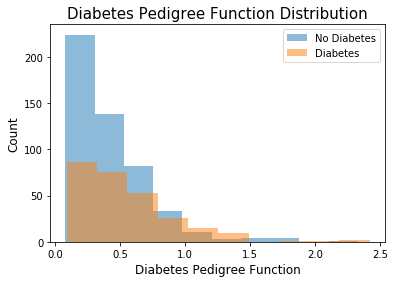

In [21]:
df2.groupby('class')['pedi'].plot.hist(alpha=0.5)
plt.title('Diabetes Pedigree Function Distribution', fontsize=15)
plt.xlabel('Diabetes Pedigree Function', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

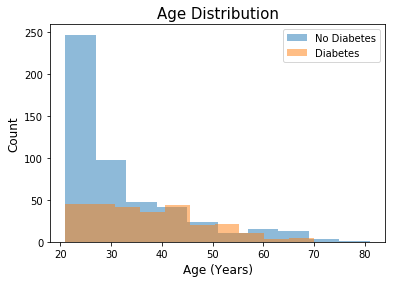

In [22]:
df2.groupby('class')['age'].plot.hist(alpha=0.5)
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.show()

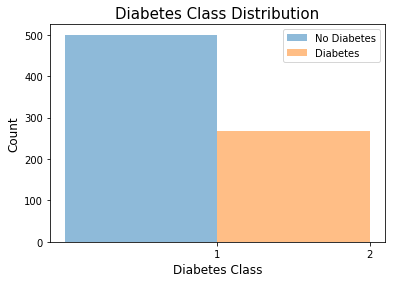

In [23]:
df2.groupby('class')['class'].plot.hist(alpha=0.5, bins=[0,1,2])
plt.title('Diabetes Class Distribution', fontsize=15)
plt.xlabel('Diabetes Class', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
plt.xticks([1,2])
plt.show()

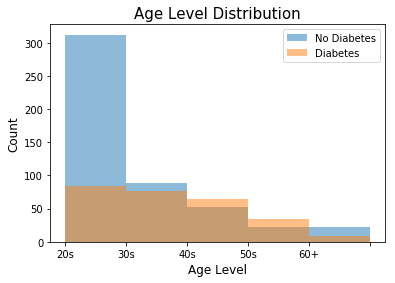

In [24]:
f, ax = plt.subplots()
df2.groupby('class')['age_level'].plot.hist(alpha=0.5, bins=[0,1,2,3,4,5])
plt.title('Age Level Distribution', fontsize=15)
plt.xlabel('Age Level', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(["No Diabetes", "Diabetes"])
#ax.set_xticks([0, 0, 1, 2, 3, 4, 5])
ax.set_xticklabels([0, '20s', '30s', '40s', '50s', '60+', ''])
plt.show()

<H2>Additional Plots</H2>

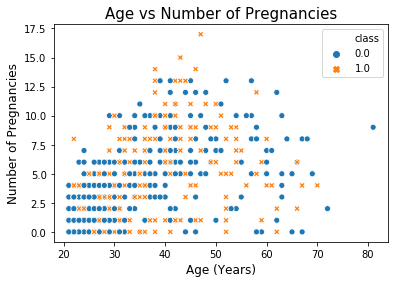

In [25]:
sns.scatterplot(x="age", y="preg", data=df2, hue = "class", style="class")
plt.title('Age vs Number of Pregnancies', fontsize=15)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Pregnancies', fontsize=12)
#plt.legend(["No Diabetes", "Diabetes"])
plt.show()

In this dataset, older patients are more likely to have had a higher number of pregnancies.

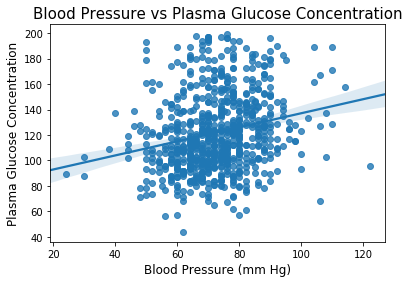

In [49]:
sns.regplot(x="pres", y="plas", data=df2)
plt.title('Blood Pressure vs Plasma Glucose Concentration', fontsize=15)
plt.xlabel('Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Plasma Glucose Concentration', fontsize=12)
plt.show()

In this dataset blood pressure is related to plasma glucose concentration, with higher blood pressure being more likely to coincide with higher plasma glucose concentration.

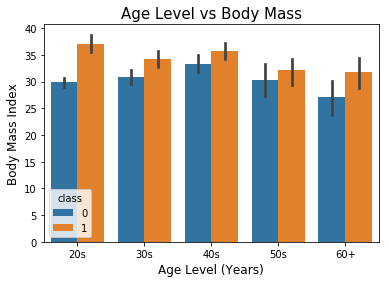

In [30]:
sns.barplot(x="age_level",   y="mass", hue="class", data=df, order=["20s", "30s", "40s", "50s", "60+"])
plt.title('Age Level vs Body Mass', fontsize=15)
plt.xlabel('Age Level (Years)', fontsize=12)
plt.ylabel('Body Mass Index', fontsize=12)
plt.show()

Age level is somewhat related to body mass in this dataset, with patients over 60 years old having a lower BMI on average than patients under 30 years old. In each age level patients with diabetes are more likely to have a higher BMI than patients without diabetes, though this difference is most pronounced in the 20s age level.

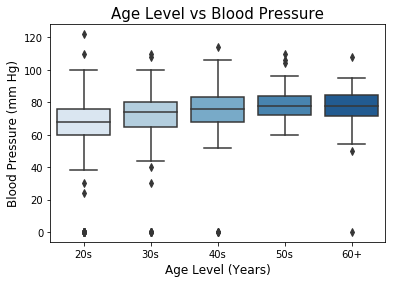

In [47]:
sns.boxplot(x="age_level", y="pres", data=df, order=["20s", "30s", "40s", "50s", "60+"], palette="Blues")
plt.title('Age Level vs Blood Pressure', fontsize=15)
plt.xlabel('Age Level (Years)', fontsize=12)
plt.ylabel('Blood Pressure (mm Hg)', fontsize=12)
plt.show()

In this dataset, older patients are more likely to have a higher blood pressure than younger patients.

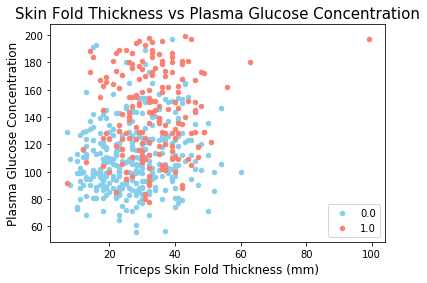

In [52]:
fig, ax = plt.subplots()
colors =   {0:'skyblue', 1:'salmon'} 
grouped = df2.groupby('class')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='skin', y='plas', label=key, color=colors[key])
plt.title('Skin Fold Thickness vs Plasma Glucose Concentration', fontsize=15)
plt.xlabel('Triceps Skin Fold Thickness (mm)', fontsize=12)
plt.ylabel('Plasma Glucose Concentration', fontsize=12)
plt.show()

In this dataset, patients with higher plasma glucose concentration are more likely to have diabetes. Patients with higher triceps skin fold thickness (a measure of body fat) are also more likely to have a high plasma glucose concentration.